In [43]:
import requests
import pandas as pd
import seaborn as sns

In [44]:
#Get the list of all foods

def requestAllFood():
    pageNum = 1
    foods = []
    while True:
        url = 'https://api.nal.usda.gov/fdc/v1/foods/list?&api_key=DLKMiNZ1JdqunkajetLlxzCgEVaE1P3FPvKwzz8f&pageSize=200&pageNumber=' + str(pageNum)
        req = requests.get(url)
        if not req.ok:
            break
        foods = foods + req.json()
        pageNum = pageNum + 1
    
    return foods

In [45]:
listOfFoods = requestAllFood()

In [46]:
print(len(listOfFoods))
print(listOfFoods[0])

10000
{'fdcId': 2353623, 'description': 'A Low-Starch and High-Fiber Diet Intervention Impacts the Microbial Community of Raw Bovine Milk', 'dataType': 'Experimental', 'publicationDate': '2022-10-28', 'foodNutrients': []}


In [47]:
#Make a dictionary with only name and iron as entries

def getIron():
    iron = []
    for food in listOfFoods:
        name = food['description']
        for nutrient in food['foodNutrients']:
            if nutrient['name'] == 'Iron, Fe':
                amount = nutrient['amount']
                temp = {'Name': name, 'Iron': amount}
                iron.append(temp)
    return iron


data = getIron()

In [48]:
# Make the iron dictionary into a DataFrame 

df = pd.DataFrame(data)
df.head(10)

,Name,Iron
0,Abalone,3.97
1,"Abiyuch, raw",1.61
2,"Acerola juice, raw",0.50
3,"Acerola, (west indian cherry), raw",0.20
4,Acorn stew (Apache),1.00
5,"Adobo, with noodles",0.99
6,"Adobo, with rice",1.34
7,Agave liquid sweetener,0.09
8,"Agave, cooked (Southwest)",3.55
9,"Agave, dried (Southwest)",3.64


In [49]:
#Sort the Data by the greatest amount of iron a food has.
df = df.sort_values(by="Iron", ascending=False)
df.head(10)


,Name,Iron
3367,"Cereals ready-to-eat, RALSTON Enriched Wheat B...",67.7
370,"Babyfood, cereal, oatmeal, with honey, dry",67.2
363,"Babyfood, cereal, oatmeal, dry fortified",64.1
276,"Baby Toddler cereal, oatmeal, dry",64.1
364,"Babyfood, cereal, Oatmeal, dry, GERBER, SINGLE...",64.0
274,"Baby Toddler cereal, oatmeal with fruit, dry",61.0
8976,"Parsley, freeze-dried",53.9
373,"Babyfood, cereal, rice, dry fortified",53.0
280,"Baby Toddler cereal, rice, dry",53.0
278,"Baby Toddler cereal, rice with fruit, dry",50.4


In [50]:
#Remove all entries/ foods that are baby foods
df = df[df["Name"].str.contains("baby") == False]
df = df[df["Name"].str.contains("baby") == False] 

Top_Ten = df.head(10)
Top_Ten

,Name,Iron
3367,"Cereals ready-to-eat, RALSTON Enriched Wheat B...",67.7
370,"Babyfood, cereal, oatmeal, with honey, dry",67.2
363,"Babyfood, cereal, oatmeal, dry fortified",64.1
276,"Baby Toddler cereal, oatmeal, dry",64.1
364,"Babyfood, cereal, Oatmeal, dry, GERBER, SINGLE...",64.0
274,"Baby Toddler cereal, oatmeal with fruit, dry",61.0
8976,"Parsley, freeze-dried",53.9
373,"Babyfood, cereal, rice, dry fortified",53.0
280,"Baby Toddler cereal, rice, dry",53.0
278,"Baby Toddler cereal, rice with fruit, dry",50.4


<AxesSubplot: xlabel='Iron', ylabel='Name'>

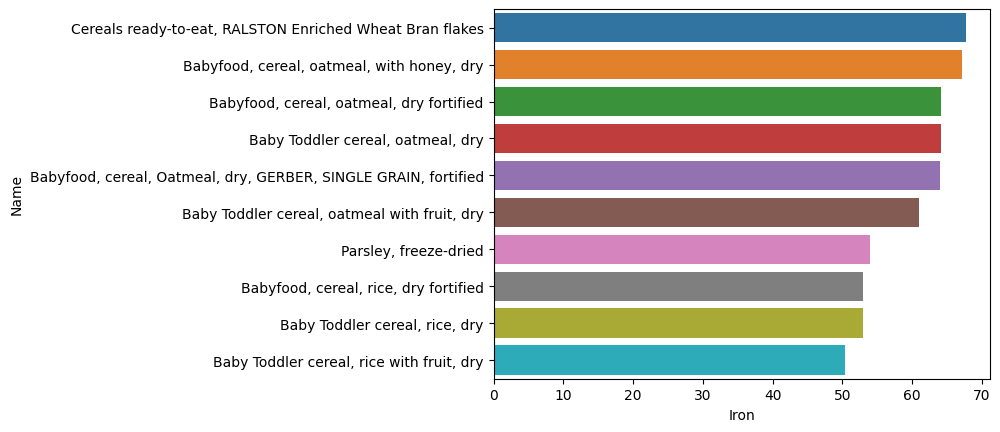

In [51]:
#PLot/ graph the data 
sns.barplot(x=Top_Ten["Iron"], y=Top_Ten["Name"])

<AxesSubplot: ylabel='Count'>

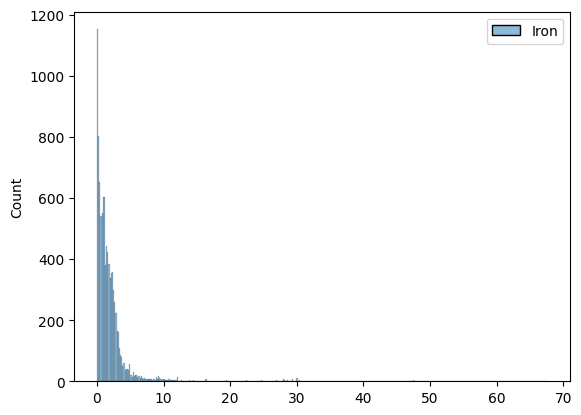

In [52]:
sns.histplot(data=df)